In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

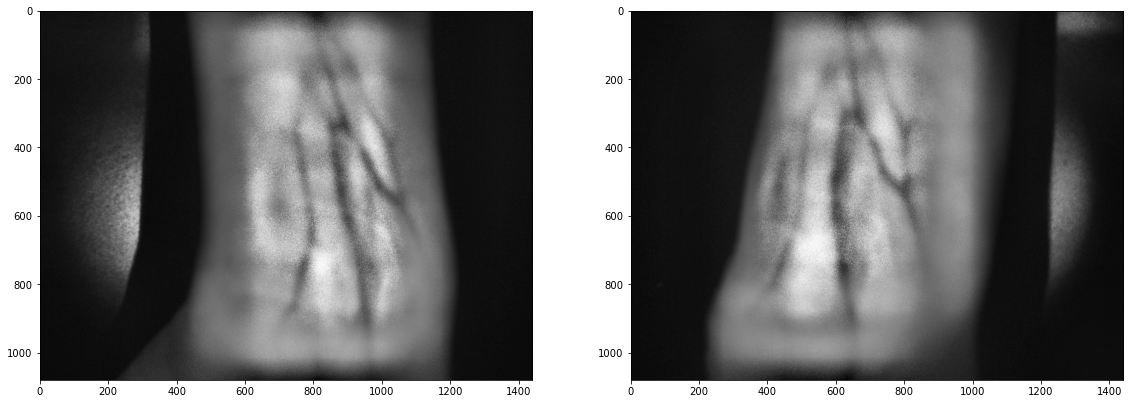

In [72]:
vein_l = cv2.imread(r"./vein_images/Left_Vein01850nm.png",0)
vein_r = cv2.imread(r"./vein_images/Right_Vein01850nm.png",0)

clahe = cv2.createCLAHE(clipLimit = 8)

feat1 = clahe.apply(vein_l)
feat2 = clahe.apply(vein_r)

plt.figure(figsize=(30,10))

ax = plt.subplot(1,3,1)

plt.imshow(feat1,cmap='gray')

# target image

ax = plt.subplot(1,3,2)
plt.imshow(feat2,cmap='gray')

In [120]:
#scaling down the images
scale = 4
widthl = int(feat1.shape[1]/scale)
heightl = int(feat1.shape[0]/scale)
diml = (widthl, heightl)
img1 = cv2.resize(feat1, diml, cv2.INTER_AREA)

widthr = int(feat2.shape[1]/scale)
heightr = int(feat2.shape[0]/scale)
dimr = (widthr, heightr)
img2 = cv2.resize(feat2, dimr, cv2.INTER_AREA)

In [125]:
orb = cv2.ORB_create()
KeyPoints1, des1 = orb.detectAndCompute(img1, None)
KeyPoints2, des2 = orb.detectAndCompute(img2, None)

In [134]:
from skimage.feature import ORB, match_descriptors

detector_extractor1 = ORB(n_keypoints=400)
detector_extractor2 = ORB(n_keypoints=400)

detector_extractor1.detect_and_extract(img1)
detector_extractor2.detect_and_extract(img2)
matches = match_descriptors(detector_extractor1.descriptors, detector_extractor2.descriptors)
matches[0][1]

329

In [126]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck= True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
# matches
# len(matches)

In [49]:
kpmatch1 = []
kpmatch2 = []
matches_ = []

for match in matches:
    if np.linalg.norm(np.asarray(KeyPoints1[match.queryIdx].pt) - np.asarray(KeyPoints2[match.trainIdx].pt)) < 20:
        kpmatch1.append(KeyPoints1[match.queryIdx])
        kpmatch2.append(KeyPoints2[match.trainIdx])
        matches_.append(match)
        
        
kpmatch1 = tuple(kpmatch1)
kpmatch2 = tuple(kpmatch2)
len(kpmatch1)

0

In [127]:
kpmatch1 = []
kpmatch2 = []
matches_ = []

i = 0
j = 0
for match in matches:
    if np.linalg.norm(np.asarray(KeyPoints1[match.queryIdx].pt) - np.asarray(KeyPoints2[match.trainIdx].pt)) < 1000:
        if np.linalg.norm(np.asarray(KeyPoints1[match.queryIdx].pt) - np.asarray(KeyPoints2[match.trainIdx].pt)) > 0:
            matches[i] = match
            print(matches[i])
            j = j+1
        
    else:
        match.distance = 5000
        matches[i] = match
#         print(matches[i])
    i = i+1

matches = sorted(matches, key = lambda x:x.distance)
matches

< cv2.DMatch 000001831CFF6990>
< cv2.DMatch 000001831CF85DB0>
< cv2.DMatch 000001831CFF9070>
< cv2.DMatch 000001831CF85A90>
< cv2.DMatch 000001831CFF6DB0>
< cv2.DMatch 000001830BA231D0>
< cv2.DMatch 000001831CFF6430>
< cv2.DMatch 000001831CFF6310>
< cv2.DMatch 000001831CFF6B70>
< cv2.DMatch 000001831CFF6330>
< cv2.DMatch 000001831CFF63F0>
< cv2.DMatch 000001831CFF91D0>
< cv2.DMatch 000001831CFF6B30>
< cv2.DMatch 000001831CFF6FB0>
< cv2.DMatch 000001831CFF63B0>
< cv2.DMatch 000001831CFF6C50>
< cv2.DMatch 000001831CFF90D0>
< cv2.DMatch 000001831CFF6550>
< cv2.DMatch 000001831CFF95F0>
< cv2.DMatch 000001831CFF6710>
< cv2.DMatch 000001831CFF9650>
< cv2.DMatch 000001831CFF66B0>
< cv2.DMatch 000001831CFF9150>
< cv2.DMatch 000001831CFF6F90>
< cv2.DMatch 000001831CFF6E10>
< cv2.DMatch 000001831CFF94F0>
< cv2.DMatch 000001831CFF91F0>
< cv2.DMatch 000001831CFF6230>
< cv2.DMatch 000001831CFF6890>
< cv2.DMatch 000001831CFF62B0>
< cv2.DMatch 000001831CFF6F50>
< cv2.DMatch 000001831CF858F0>
< cv2.DM

[< cv2.DMatch 000001831CFF6990>,
 < cv2.DMatch 000001831CF85DB0>,
 < cv2.DMatch 000001831CFF9070>,
 < cv2.DMatch 000001831CF85A90>,
 < cv2.DMatch 000001831CFF6DB0>,
 < cv2.DMatch 000001830BA231D0>,
 < cv2.DMatch 000001831CFF6430>,
 < cv2.DMatch 000001831CFF6310>,
 < cv2.DMatch 000001831CFF6B70>,
 < cv2.DMatch 000001831CFF6330>,
 < cv2.DMatch 000001831CFF63F0>,
 < cv2.DMatch 000001831CFF91D0>,
 < cv2.DMatch 000001831CFF6B30>,
 < cv2.DMatch 000001831CFF6FB0>,
 < cv2.DMatch 000001831CFF63B0>,
 < cv2.DMatch 000001831CFF6C50>,
 < cv2.DMatch 000001831CFF90D0>,
 < cv2.DMatch 000001831CFF6550>,
 < cv2.DMatch 000001831CFF95F0>,
 < cv2.DMatch 000001831CFF6710>,
 < cv2.DMatch 000001831CFF9650>,
 < cv2.DMatch 000001831CFF66B0>,
 < cv2.DMatch 000001831CFF9150>,
 < cv2.DMatch 000001831CFF6F90>,
 < cv2.DMatch 000001831CFF6E10>,
 < cv2.DMatch 000001831CFF94F0>,
 < cv2.DMatch 000001831CFF91F0>,
 < cv2.DMatch 000001831CFF6230>,
 < cv2.DMatch 000001831CFF6890>,
 < cv2.DMatch 000001831CFF62B0>,
 < cv2.DMa

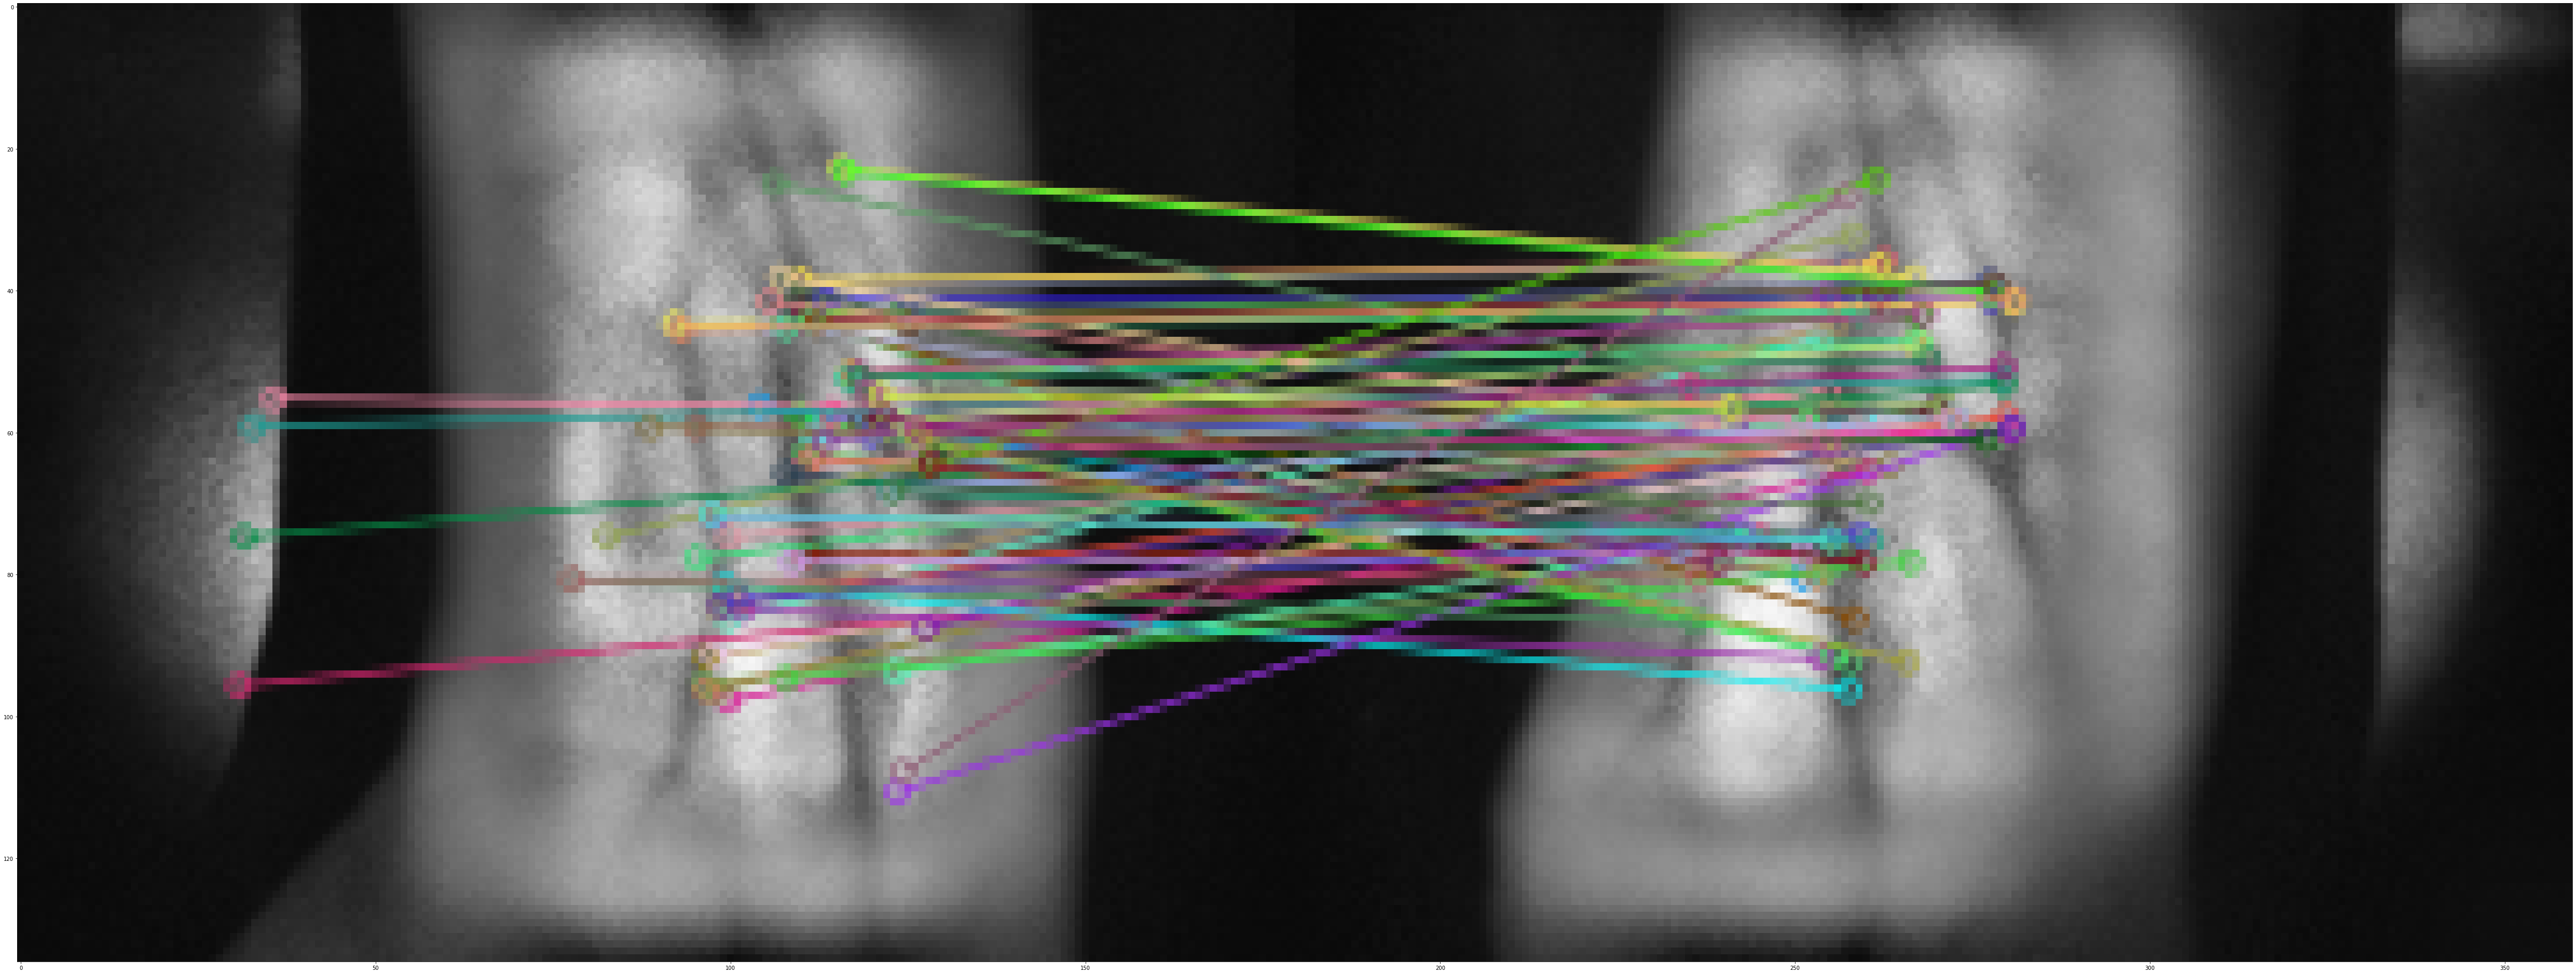

In [128]:
matching_result = []
matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches[0:j+1], None, flags=2)

mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
plt.figure(figsize=(300,100))
ax = plt.subplot(1,3,1)
plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches[0:i+1]:
    p1.append([KeyPoints1[match.queryIdx].pt])
    p2.append([KeyPoints2[match.trainIdx].pt])

p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale

In [142]:
# matching_result = []
# matching_result = cv2.drawMatches(img1, KeyPoints1, img2, KeyPoints2, matches[0:j+1], None, flags=2)

# mr = cv2.resize(matching_result, (0, 0), fx = 0.5, fy = 0.5)
# plt.figure(figsize=(300,100))
# ax = plt.subplot(1,3,1)
# plt.imshow(mr, cmap = 'gray')

p1=[]
p2=[]
for match in matches:
    p1.append(detector_extractor1.keypoints[match[0]])
    p2.append(detector_extractor2.keypoints[match[1]])

p1 = np.array(p1)
p2 = np.array(p2)

p1 = p1.reshape(p1.shape[0],2)
p2 = p2.reshape(p2.shape[0],2)

p1 = p1*scale
p2 = p2*scale